In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
df = pd.read_csv("sleep1.csv")

In [5]:
df

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,NaN,NaN,3.3,6654.000,5712.0,38.6,645.0,3,5,3
1,African_giant_pouched_rat,6.3,2.0,8.3,1.000,6.6,4.5,42.0,3,1,3
2,Arctic_Fox,NaN,NaN,12.5,3.385,44.5,14.0,60.0,1,1,1
3,Arctic_ground_squirrel,NaN,NaN,16.5,0.920,5.7,NaN,25.0,5,2,3
4,Asian_elephant,2.1,1.8,3.9,2547.000,4603.0,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Tree_hyrax,4.9,0.5,5.4,2.000,12.3,7.5,200.0,3,1,3
58,Tree_shrew,13.2,2.6,15.8,0.104,2.5,2.3,46.0,3,2,2
59,Vervet,9.7,0.6,10.3,4.190,58.0,24.0,210.0,4,3,4
60,Water_opossum,12.8,6.6,19.4,3.500,3.9,3.0,14.0,2,1,1


In [65]:
print(df.describe())

       slowWaveSleep  dreamSleep      sleep         body        brain  \
count      48.000000   50.000000  58.000000    62.000000    62.000000   
mean        8.672917    1.972000  10.532759   198.789984   283.134194   
std         3.666452    1.442651   4.606760   899.158011   930.278942   
min         2.100000    0.000000   2.600000     0.005000     0.140000   
25%         6.250000    0.900000   8.050000     0.600000     4.250000   
50%         8.350000    1.800000  10.450000     3.342500    17.250000   
75%        11.000000    2.550000  13.200000    48.202500   166.000000   
max        17.900000    6.600000  19.900000  6654.000000  5712.000000   

             life   gestation  predation  sleepExposure     danger  
count   58.000000   58.000000  62.000000      62.000000  62.000000  
mean    19.877586  142.353448   2.870968       2.419355   2.612903  
std     18.206255  146.805039   1.476414       1.604792   1.441252  
min      2.000000   12.000000   1.000000       1.000000   1.000000

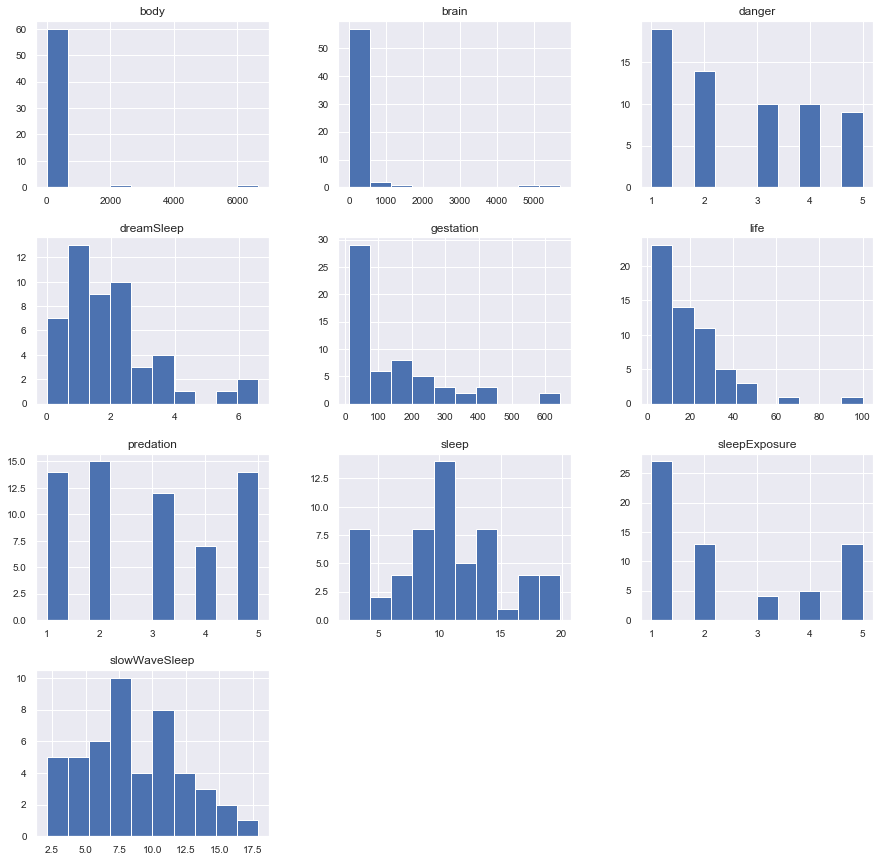

In [73]:
sns.set()
df.hist(sharex = False, sharey = False, xlabelsize = 10, ylabelsize = 10, figsize=(15, 15))
pyplot.show()

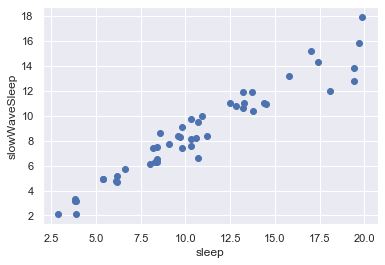

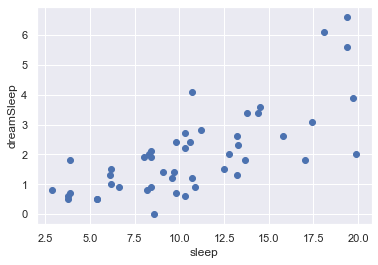

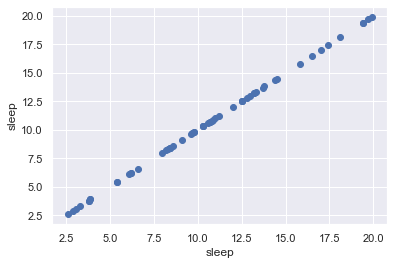

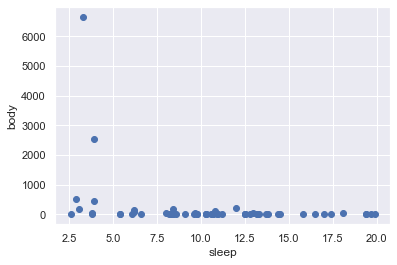

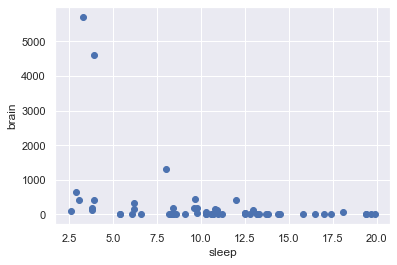

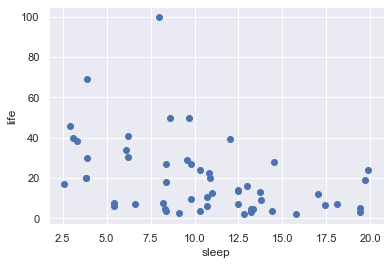

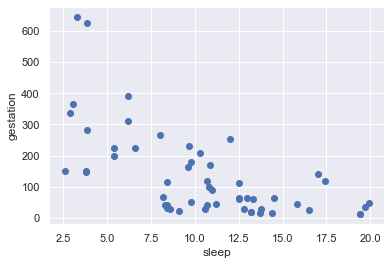

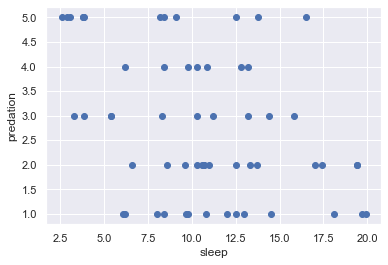

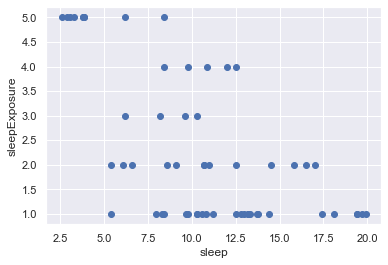

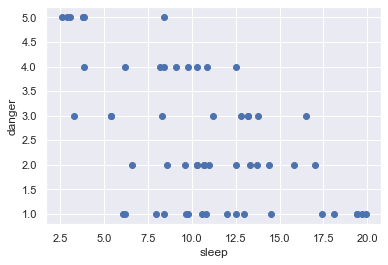

In [80]:
for i in range(1, df.shape[1]):
    pyplot.scatter(df[df.columns[3]], df[df.columns[i]])
    pyplot.xlabel(df.columns[3])
    pyplot.ylabel(df.columns[i])
    pyplot.show()

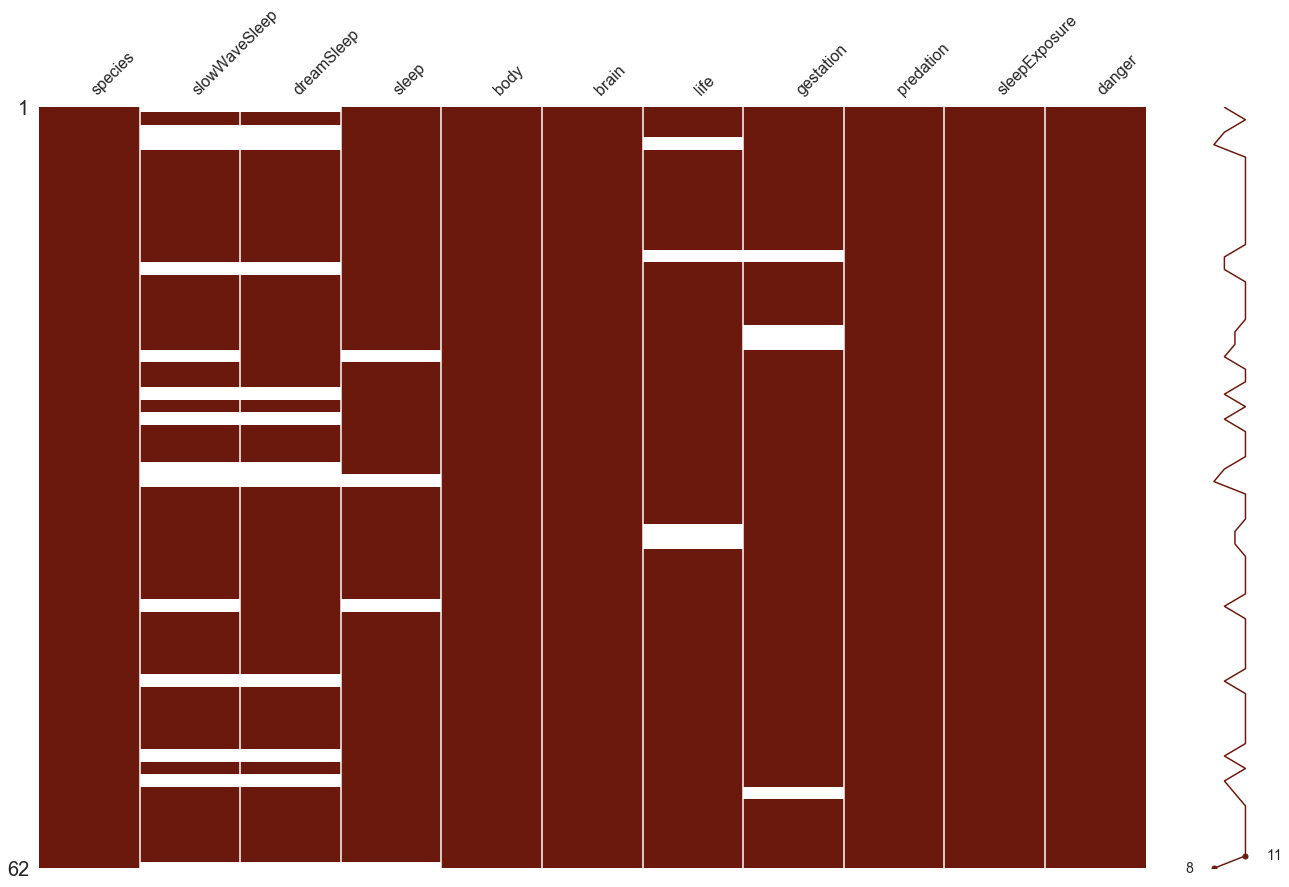

In [81]:
md_copy = df
md_copy = md_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=md_copy.iloc[:,:], figsize=(22, 14), color=(0.42, 0.1, 0.05))

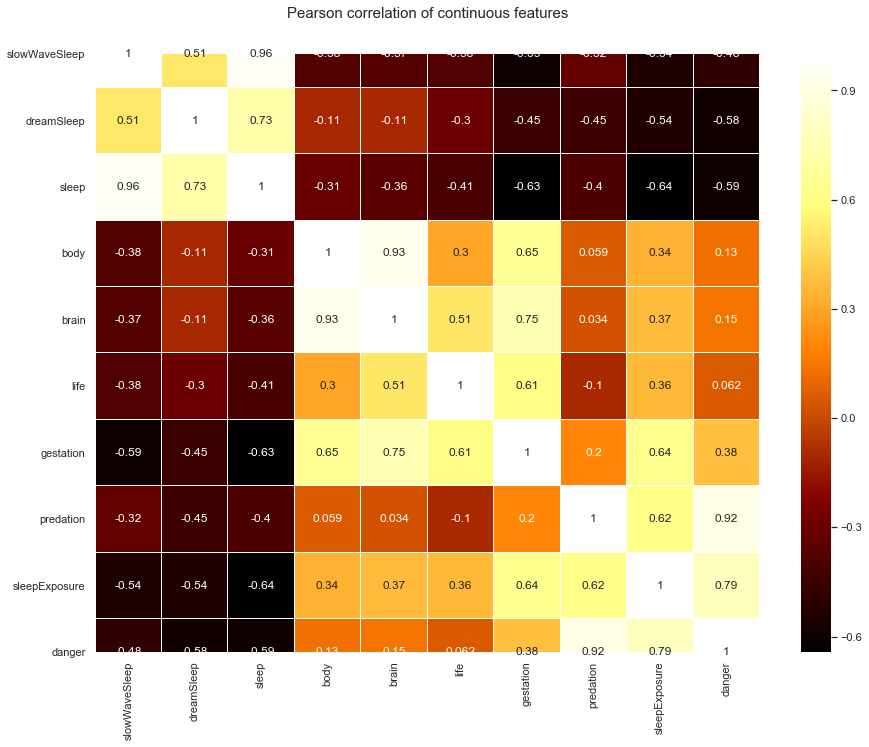

In [88]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(15,11))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

In [208]:
df[df.columns[0]]

0              African_elephant
1     African_giant_pouched_rat
2                    Arctic_Fox
3        Arctic_ground_squirrel
4                Asian_elephant
                ...            
57                   Tree_hyrax
58                   Tree_shrew
59                       Vervet
60                Water_opossum
61        Yellow-bellied_marmot
Name: species, Length: 62, dtype: object

In [209]:
x = df[df.columns[1:]].fillna(0)
#x.drop('sleep', axis = 1, inplace=True)
y = df[df.columns[3]].fillna(0)

#x = pd.DataFrame(StandardScaler().fit_transform(x), columns = df.columns[1:].drop('sleep'), index = df[df.columns[0]])
x = pd.DataFrame(StandardScaler().fit_transform(x), columns = df.columns[1:], index = df[df.columns[0]])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [210]:
x

,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
species,,,,,,,,,,
African_elephant,-1.389830,-1.059781,-1.280123,7.237778,5.883379,1.103601,3.528883,0.088109,1.621215,0.270776
African_giant_pouched_rat,-0.085800,0.273007,-0.303411,-0.221768,-0.299686,-0.777584,-0.628579,0.088109,-0.891668,0.270776
Arctic_Fox,-1.389830,-1.059781,0.517027,-0.219094,-0.258613,-0.253500,-0.504476,-1.277583,-0.891668,-1.128234
Arctic_ground_squirrel,-1.389830,-1.059781,1.298397,-0.221858,-0.300661,-1.025834,-0.745788,1.453801,-0.263447,0.270776
Asian_elephant,-0.955154,0.139728,-1.162918,2.632885,4.681532,2.780670,3.384096,0.088109,1.621215,0.970281
...,...,...,...,...,...,...,...,...,...,...
Tree_hyrax,-0.375585,-0.726584,-0.869904,-0.220647,-0.293509,-0.612084,0.460773,0.088109,-0.891668,0.270776
Tree_shrew,1.342423,0.672843,1.161657,-0.222773,-0.304129,-0.898951,-0.601001,0.088109,-0.263447,-0.428729
Vervet,0.617962,-0.659945,0.087274,-0.218191,-0.243983,0.298167,0.529719,0.770955,0.364773,0.970281


In [211]:
for i in range(y.shape[0]):
    if y[i] < 8.05:
        y[i] = 1
    elif y[i] < 10.450000:
        y[i] = 2
    elif y[i] < 13.2:
        y[i] = 3
    else:
        y[i] = 4

In [212]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

finalDf = pd.concat([principalDf, y], axis = 1)

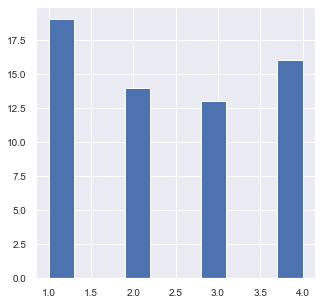

In [213]:
sns.set()
y.hist(xlabelsize = 10, ylabelsize = 10, figsize=(5, 5))
pyplot.show()

In [214]:
finalDf.index = df[df.columns[0]]
finalDf

,PC1,PC2,PC3,sleep
species,,,,
African_elephant,7.197754,6.205861,2.461120,1.0
African_giant_pouched_rat,-0.750708,-0.644713,-0.047496,2.0
Arctic_Fox,-0.849403,0.579964,-2.171541,3.0
Arctic_ground_squirrel,-0.064886,-1.544010,-0.238388,4.0
Asian_elephant,5.672996,4.147324,1.534705,1.0
...,...,...,...,...
Tree_hyrax,0.304395,-0.573047,-0.739351,1.0
Tree_shrew,-1.871250,-0.160049,1.119445,4.0
Vervet,0.755533,-0.837909,0.548377,2.0


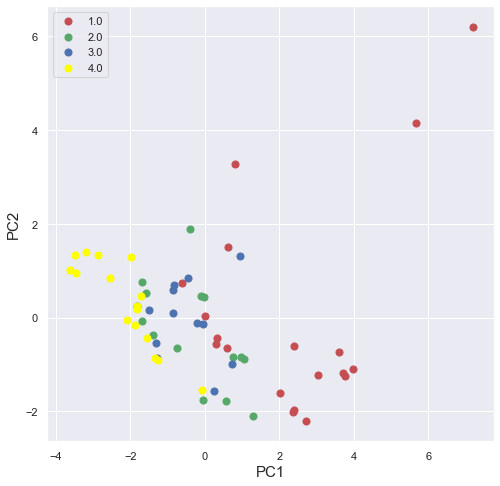

In [215]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
targets = [1.0, 2.0, 3.0, 4.0]
colors = ['r', 'g', 'b', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sleep'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)

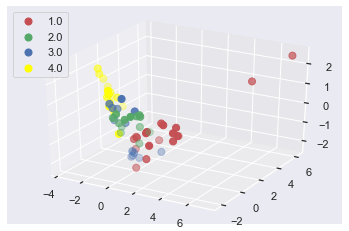

In [216]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

#ax.plot3D(finalDf['PC1'], finalDf['PC2'], finalDf['PC3'])
#ax.set_xlabel('PC1', fontsize = 15)
#ax.set_ylabel('PC2', fontsize = 15)
#ax.set_ylabel('PC3', fontsize = 15)
targets = [1.0, 2.0, 3.0, 4.0]
colors = ['r', 'g', 'b', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sleep'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50
               )
ax.legend(targets)

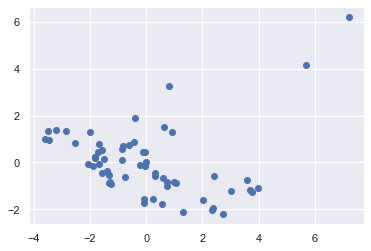

In [194]:
plt.scatter(x=finalDf['PC1'], y=finalDf['PC2'])

In [175]:
print(pca.explained_variance_ratio_) 

[0.4801663  0.21371824 0.12555361]


Text(0, 0.5, 'explained_variance_ratio_')

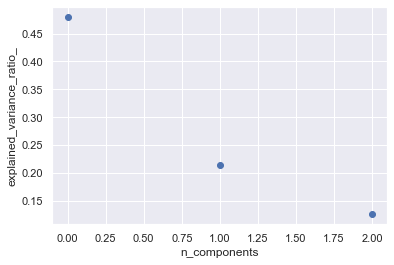

In [176]:
plt.plot(pca.explained_variance_ratio_, "o", linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Text(0, 0.5, 'explained_variance_ratio_')

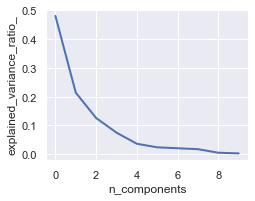

In [197]:
pca2 = PCA()
pca2.fit(x)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca2.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')